In [1]:
import numpy as np 
import cv2
import os
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from random import random

In [2]:
def LoadDataset ( Path , Extension , SingleFile, ImageType ) :
    Datasets = []
    FileName = []
    if SingleFile : 
        FileName.append(Path + Extension )
        Path = ''
    else : 
        for File in os.listdir(os.path.dirname(Path)):
            if ImageType or Extension=="*" : 
                FileName.append(File) 
                continue 
            if File.endswith(Extension):
                FileName.append(File) 

    #Use this to check Correct file is added or not
    #print(FileName)
    if Extension == ".csv" :
        for EachFileName in FileName : 
            Dataset = []
            with open(Path + EachFileName , 'r') as File:
                Reader = csv.reader(File)
                for EachRow in Reader:
                    Dataset.append(EachRow)
            Datasets.append(Dataset)
    if ImageType : 
        for EachFileName in FileName : 
            img = cv2.imread(Path+EachFileName)
            Datasets.append(img)
    if len(Datasets) == 1 :
        Datasets = Datasets[0]
    return Datasets , FileName 

In [3]:
def ShowImage(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))    
    plt.show()

yes =  155
no =  98


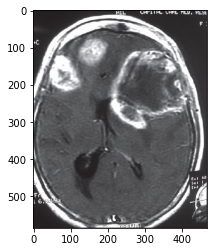

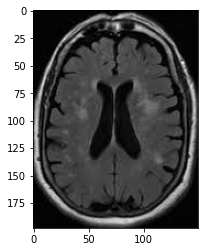

In [4]:
DatasetLocation = "../Datasets/brain_tumor_dataset/"
Class = ["yes","no"]
Datasets = []
for EachClass in Class :
    Datasets.append(LoadDataset(DatasetLocation+EachClass+ "/", ".JPG" , False ,True ))
[[DataYes , dummy] , [DataNo , dummy]] = Datasets
print("yes = " , len(DataYes))
print("no = " ,  len(DataNo))
ShowImage(DataYes[0])
ShowImage(DataNo[0])

In [5]:
def DataAugmentation (Data,Location):
    demo_datagen = ImageDataGenerator(
        rotation_range=15,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        brightness_range=[0.5, 1.5],
        horizontal_flip=True,
        vertical_flip=True
    )
    
    for img in Data:
        i=0
        img = img.reshape((1,) + img.shape) 
        for batch in demo_datagen.flow(img, batch_size=1, save_to_dir=Location, save_prefix='aug_img', save_format='jpg'):
            i += 1
            if(i>(random()*100)%6):
                break 


yes =  385
no =  281


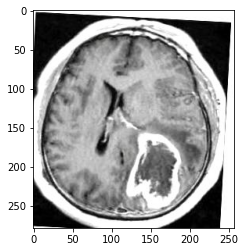

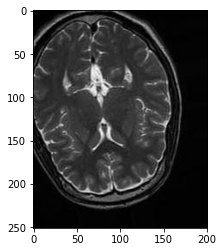

In [6]:
os.mkdir('../Datasets/brain_tumor_dataset/Augmented/')

os.mkdir('../Datasets/brain_tumor_dataset/Augmented/yes')
DataAugmentation(DataYes,'../Datasets/brain_tumor_dataset/Augmented/yes')

os.mkdir('../Datasets/brain_tumor_dataset/Augmented/no')
DataAugmentation(DataNo,'../Datasets/brain_tumor_dataset/Augmented/no')

DatasetLocation = "../Datasets/brain_tumor_dataset/Augmented/"
Datasets = []
for EachClass in Class :
    Datasets.append(LoadDataset(DatasetLocation+EachClass+ "/", ".JPG" , False ,True ))
[[DataYes , dummy] , [DataNo , dummy]] = Datasets
print("yes = " , len(DataYes))
print("no = " ,  len(DataNo))
ShowImage(DataYes[0])
ShowImage(DataNo[0])